## Model Selection:

there is a lot of techniques to select the best model, the most pratical and famouss one is called $cross-validation$, it consist to divided  the $data$ into $k$ equal parts(typically $K$ between 5 and 10), we train the model in $(K-1)/K$100% of $data$ and test it in the the rest(its called $data$ $~$ $validation$) and conserve the $error$ of $test$$~$ $data$ , so we perform the procdure [training the model=>test it=>evaluate it(conserve the error)] $k$ times and $return$ the total $error$.
the amazing  book $Deep$$~$$learning$ 2016 grant us by the $cross-validation$ algorithm:


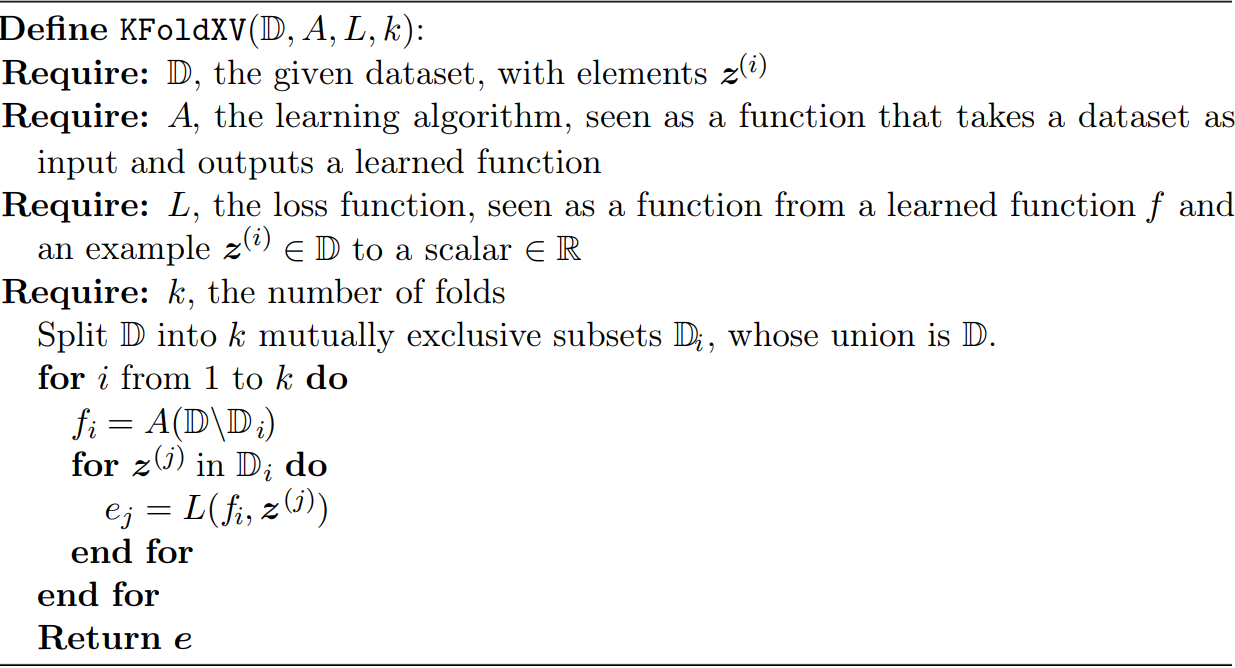

In [17]:
import numpy as np
import sys
if not sys.warnoptions:# ==> surpress the warning , this is optional
    import warnings
    warnings.filterwarnings('ignore')

import numpy as np
''' implementing Kfoding cross-validation based on the book Deep Learning 2016'''
class KfoldXV:
     def __init__(self, X, y, K, Algorithm, Loss):

        '''
        cross-validation is a practical technique that uses to jusitify
        that algorithm A better than algorithm B in a specific task
        X:the data's features(attribus), the input
        y: the target data
        k:number of partitions(subdatates doesn't overlaping) X=Union{x_i} for i in {1, ..K} and x_i intersect x_j is empty if i not equal j
        Algorithm:algorithm learning, strategy to optimize the problem
        loss:erro function, cost function (e,g: binarycrossentropy, mean_squred_error...) it mesure the difference
        between prediction y_pred madeed by algorithm and the target y(regression), or count number(y_pred==y) (accuracy classification
        '''
        self.X=X
        self.y=y
        self.Algorithm=Algorithm
        self.K=K
        self.Loss=Loss


     def split(self):
          X_partitions=[]
          y_partitions = []
          N=self.X.shape[0]
          self.l=N//self.K
          for i in range(self.K):
              X_partitions.append(self.X[i*self.l:(i+1)*self.l])
              y_partitions.append(self.y[i * self.l:(i + 1) * self.l])
          return np.concatenate(X_partitions), np.concatenate(y_partitions)

     def loss(self, y_pred, y_real):
          return self.Loss(y_pred, y_real)

     def fit(self):
          e=0
          for i in range(self.K):
              X_partitions, y_partitions = self.split()
              X_partitions=np.delete(X_partitions, i)
              y_partitions = np.delete(y_partitions, i)
              self.Algorithm.fit( X_partitions, y_partitions)
              for j in range(self.l):
                  ej=self.loss((self.Algorithm.predict(self.X[i*self.l+j])), self.y[i*self.l+j])
                  e+=ej
          return e

###############################-----Evaluation of the algorithm(regressor)------#######################
def squared_error(X, y):
   return ((X - y)**2).mean()

class PolynomialRegression:

   def __init__(self, M: int = 3):
    'M is really depend to your task'
    self.M = M
    # intializationthe weight with M random vaues between -1 and 1
    self.w = np.random.rand(M)

   def fit(self, X, t):
    # convert X, y to numpy array
    X, t = np.array(X), np.array(t)
    assert X.ndim == t.ndim
    # degree M must be less than N number of data ponits(M<N)
    #assert self.M < X.shape[0]
    # w is weights (coefficients)that matching(fitting) to the polynomial regession
    self.w = np.polyfit(X, t, deg=self.M)  # deg is the degree of the polynom set it a M
    return self.w

   def predict(self, x):
    y = np.poly1d(self.w)(x)
    return y
       
X = np.linspace(0,1,50)
y1= np.sin(2*np.pi*X) 
y2=X**3+3*X**2+5
K=10
M=0

for i in range(40):
     M+=1
     Kfold=KfoldXV(X=X, y=y1, K=K, Algorithm=PolynomialRegression(M=M), Loss=squared_error)
     error=Kfold.fit()
     print('M', M,'error1-->', error)
M=0
for i in range(10):
     M+=1
     Kfold=KfoldXV(X=X, y=y2, K=K, Algorithm=PolynomialRegression(M=M), Loss=squared_error)
     error=Kfold.fit()
     print('M=', M,'error2-->', error)

M 1 error1--> 10.641749933238675
M 2 error1--> 11.328014200727964
M 3 error1--> 0.2817856142475381
M 4 error1--> 0.312668301128063
M 5 error1--> 0.0014199895746893343
M 6 error1--> 0.0018036766911999535
M 7 error1--> 2.572930071340993e-06
M 8 error1--> 3.940102385340062e-06
M 9 error1--> 2.2285662882415986e-09
M 10 error1--> 4.402646885370977e-09
M 11 error1--> 1.185983697526648e-12
M 12 error1--> 3.047674022748913e-12
M 13 error1--> 4.237502565040202e-16
M 14 error1--> 1.369769063731622e-15
M 15 error1--> 1.0535308206796275e-19
M 16 error1--> 4.169811408214402e-19
M 17 error1--> 1.7262114049043327e-23
M 18 error1--> 7.602834539813614e-23
M 19 error1--> 3.4686418704486018e-25
M 20 error1--> 5.179609483558154e-25
M 21 error1--> 5.287552274506025e-25
M 22 error1--> 1.3236613413146815e-23
M 23 error1--> 7.306764841008241e-25
M 24 error1--> 5.748335302623275e-24
M 25 error1--> 1.9931196695303586e-23
M 26 error1--> 2.9235467568472332e-24
M 27 error1--> 6.1405420130166425e-24
M 28 error1--> 

the $cross-validtion$ technique perform well for the genenerating $y2=x^3+3x^2+5$ thus estimate that best model is $PolynomialRegression(M=3)$(the lowest error), and for generalization complex data ($y1=\sin(2\pi x)$) $cross-validtion$ choose $M=19$ as best parameters, however this technique is costly on term of time(raunning algorithm $k$ times) and in term of computationaly especially in the more complex model such as neural networks and mixture models.
there is a another techniques there in some cases might outperforform $cross-validtion$, such as $GridSearch$, $RandomSearch$, $BayesianSearch$...and many more, absolutely we will cover them later